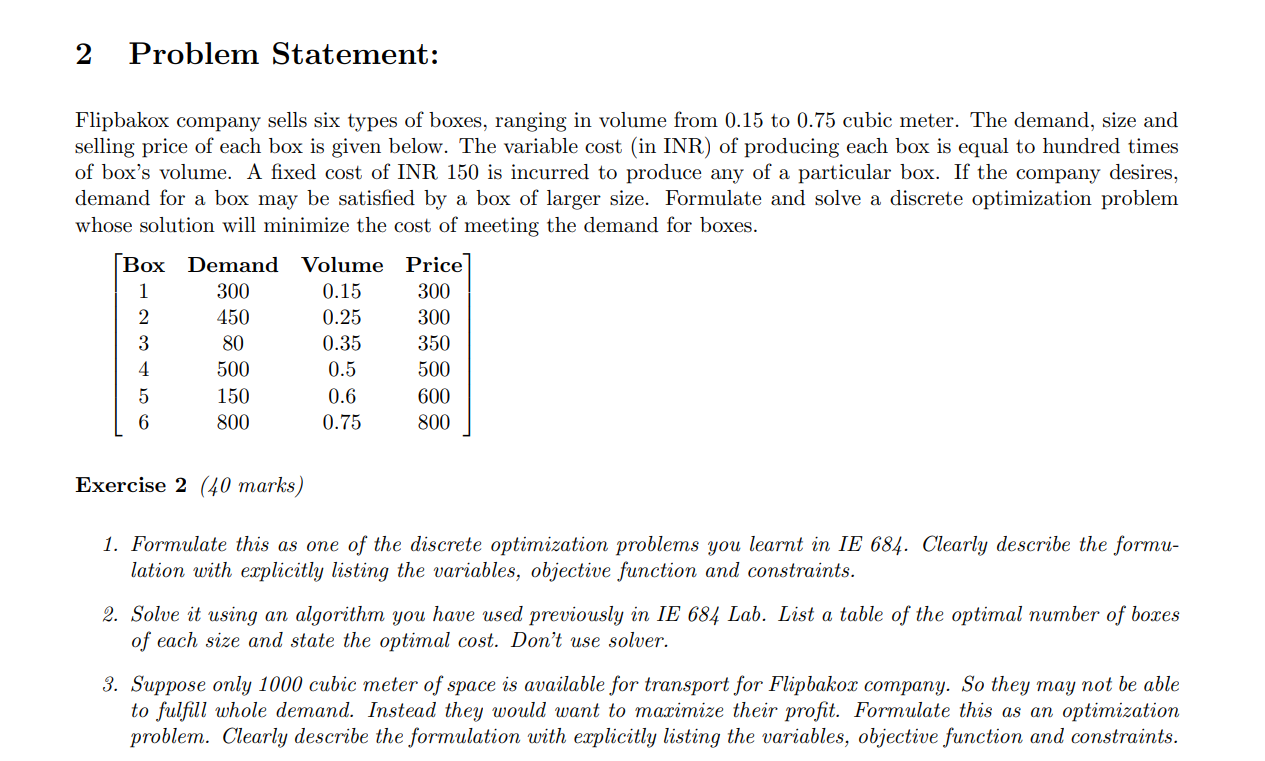

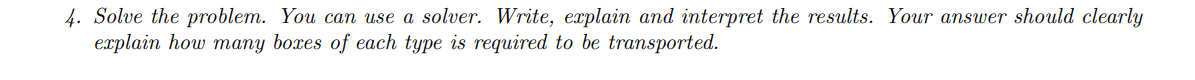

#Question 1

# Decision Variables:

- $xi$ The number of boxes of type i produced. This is a non-negative integer variable, meaning $xi ∈ N ∪ {0}$, as we cannot produce a negative number of boxes.
- $yi$ A binary variable indicating whether any boxes of type i are produced. If $xi > 0$, then yi = 1, otherwise $yi = 0$.

# Objective Function:

The objective is to minimize the total cost of meeting the demand for boxes. The cost consists of two parts:

- Fixed cost: $1500 * yi$. This represents the fixed cost of producing box type i, which is incurred if any boxes of type i are produced (i.e., yi = 1).
- Variable cost: $100 * vi * xi.$ This represents the variable cost of producing xi boxes of type i, where vi is the volume of box type i.


$$ minimize \quad \sum_{i=1}^{6} \left(1500 \cdot y_i + 100 \cdot v_i \cdot x_i \right)$$



# Constraints:

- Demand Constraint: The total demand for each box type must be satisfied. $xi ≥ di$ for $i = 1, 2, ..., 6$, where di is the demand for box type $i$.
- Big M Method: This method is used to enforce the binary nature of $yi$. It ensures that xi can only be positive if $yi = 1$. The constraint is written as: $0 ≤ xi ≤ M * yi$ for $i = 1, 2, ..., 6$, where $M$ is a sufficiently large number. If $yi = 0$, then $xi$will be forced to be zero.

Demand constraints:
$∑xᵢ ⋅ vᵢ ≥ dᵢ$ for $i=1,2,…,6$

Where:
- $∑ represents summation over i from 1 to 6.$
- $xᵢ represents the quantity of box type i.$
- $vᵢ represents the volume of box type i.$
- $dᵢ represents the demand for box type i.$



#Question 2

In [5]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

In [19]:
# # Define box data
# box_data = [
#     {"demand": 300, "volume": 0.15, "price": 300},
#     {"demand": 450, "volume": 0.25, "price": 300},
#     {"demand": 80, "volume": 0.35, "price": 350},
#     {"demand": 500, "volume": 0.5, "price": 500},
#     {"demand": 150, "volume": 0.6, "price": 600},
#     {"demand": 800, "volume": 0.75, "price": 800}
# ]

# # Define variable and fixed costs
# fixed_cost = 1500


In [22]:
# Recursive function to find minimum cost and box sizes
# def min_cost_recursive(demand):
#     if demand <= 0:
#         return 0, []  # Base case: No cost needed

#     min_cost = float('inf')
#     min_boxes = []

#     for box in box_data:
#         if box["demand"] <= demand:
#             cost_with_current_box, boxes_with_current_box = min_cost_recursive(demand - box["demand"])
#             total_cost = cost_with_current_box + box["price"] + fixed_cost
#             if total_cost < min_cost:
#                 min_cost = total_cost
#                 min_boxes = [box["volume"]] + boxes_with_current_box

#     return min_cost, min_boxes


In [23]:

# # Main function to calculate minimum cost and box sizes
# def calculate_minimum_cost_and_boxes(total_demand):
#     min_cost, min_boxes = min_cost_recursive(total_demand)
#     return min_cost, min_boxes

# # Test the function
# total_demand = 2000
# min_cost, min_boxes = calculate_minimum_cost_and_boxes(total_demand)
# print("Minimum cost:", min_cost)
# print("Box sizes:", min_boxes)


Minimum cost: 7700
Box sizes: [0.15, 0.25, 0.25, 0.75]


In [31]:
# Box data
demand = [300, 450, 80, 500, 150, 800]
volume = [0.15, 0.25, 0.35, 0.5, 0.6, 0.75]
price = [300, 300, 350, 500, 600, 800]

# Recursive function to find the optimal solution
def recursive_knapsack(demand, volume, price, capacity, index=0, remaining_capacity=capacity, total_profit=0, selected_boxes=[]):
    # Base case: If all boxes have been considered or remaining capacity is zero
    if index >= len(demand) or remaining_capacity <= 0:
        return total_profit, selected_boxes

    # Recursive call to consider including the current box
    if volume[index] <= remaining_capacity:
        profit_with_box, selected_with_box = recursive_knapsack(demand, volume, price, capacity, index + 1,
                                                                remaining_capacity - volume[index],
                                                                total_profit + price[index],
                                                                selected_boxes + [index + 1])
    else:
        profit_with_box, selected_with_box = float('-inf'), []

    # Recursive call to consider excluding the current box
    profit_without_box, selected_without_box = recursive_knapsack(demand, volume, price, capacity, index + 1,
                                                                  remaining_capacity, total_profit,
                                                                  selected_boxes)

    # Compare the profits obtained with and without the current box
    if profit_with_box > profit_without_box:
        return profit_with_box, selected_with_box
    else:
        return profit_without_box, selected_without_box

# Maximum available capacity
capacity = 1  # Considering 1 as the available capacity

# Call the recursive function
max_profit, selected_boxes = recursive_knapsack(demand, volume, price, capacity)

# Print the results
print("Optimal total profit:", max_profit)
print("Selected boxes:", selected_boxes)


Optimal total profit: 1200
Selected boxes: [1, 2, 5]


#Question 3

**Decision Variables and Definitions:**

Let xi denote the number of boxes of type i produced. This variable is restricted to non-negative integers, meaning xi ∈ ℕ ∪ {0}.

We introduce binary variables yi to indicate whether any boxes of type i are produced. Specifically, yi = 1 if xi > 0, and yi = 0 otherwise.

**Enforcing Constraints using Big M Method:**

To ensure the binary nature of yi, we utilize the Big M Method. This method sets an upper bound on xi based on the value of yi, preventing xi from being positive unless yi = 1.

This constraint is mathematically represented as:

xi ≤ M * yi for i = 1, 2, …, 6

Where M is a sufficiently large constant.

**Objective Function:**

The objective is to maximize profit, which is calculated as the difference between the revenue from selling the boxes and the total cost of production.

Mathematically, the objective function can be expressed as:

Maximize $∑_{i=1}^{6} (pi * xi - (1500 * yi + 100 * vi * xi))$

This can be simplified to:

Maximize $∑_{i=1}^{6} ((pi - 100 * vi) * xi - 1500 * yi)$

**Constraints:**

**Volume Constraint:**

We must ensure that the total volume of all produced boxes does not exceed a maximum capacity of 1000. This constraint is expressed as:

$∑_{j=1}^{6} xi * vi ≤ 1000$

**Big M Method Constraint:**

As mentioned earlier, the Big M Method is employed to enforce the binary nature of yi, ensuring that xi can only be positive if yi = 1. This constraint is applied individually to each box type i, resulting in:

$xi ≤ M * yi for i = 1, 2, …, 6$


#Question 4

In [24]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

In [25]:
from pyomo.environ import*

In [26]:

# Define the demand, volume, and price data
demand = [300, 450, 80, 500, 150, 800]
volume = [0.15, 0.25, 0.35, 0.5, 0.6, 0.75]
price = [300, 300, 350, 500, 600, 800]
M = 100000000

# Create the concrete model
model = ConcreteModel()

# Define decision variables
model.x = Var(range(6), domain=NonNegativeIntegers)
model.y = Var(range(6), domain=Binary)

# Define the objective function
model.obj = Objective(expr=sum(((price[i] - 100 * volume[i]) * model.x[i] - 1500 * model.y[i]) for i in range(6)), sense=maximize)

# Define constraints
model.constraints = ConstraintList()
model.constraints.add(expr=sum(model.x[i] * volume[i] for i in range(6)) <= 1000)
for i in range(6):
    model.constraints.add(expr=model.x[i] <= M * model.y[i])

# Solve the model
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
result = solver.solve(model)

# Print the model
model.pprint()


2 Var Declarations
    x : Size=6, Index={0, 1, 2, 3, 4, 5}
        Key : Lower : Value  : Upper : Fixed : Stale : Domain
          0 :     0 : 6666.0 :  None : False : False : NonNegativeIntegers
          1 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          2 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          3 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          4 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          5 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
    y : Size=6, Index={0, 1, 2, 3, 4, 5}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   1.0 :     1 : False : False : Binary
          1 :     0 :   0.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :

In [27]:
# Print the values of decision variables
for i in range(6):
    print(f"Number of boxes of type {i+1}: {model.x[i].value}")

# Print whether boxes of each type are produced or not
for i in range(6):
    if model.y[i].value == 1:
        print(f"Boxes of type {i+1} are produced.")
    else:
        print(f"Boxes of type {i+1} are not produced.")


Number of boxes of type 1: 6666.0
Number of boxes of type 2: 0.0
Number of boxes of type 3: 0.0
Number of boxes of type 4: 0.0
Number of boxes of type 5: 0.0
Number of boxes of type 6: 0.0
Boxes of type 1 are produced.
Boxes of type 2 are not produced.
Boxes of type 3 are not produced.
Boxes of type 4 are not produced.
Boxes of type 5 are not produced.
Boxes of type 6 are not produced.


#Observation

**Number of Boxes Produced:**

The optimal solution provides the number of boxes of each type required to be produced. These values are determined by the model to maximize profit while meeting demand constraints and considering production costs. For each type of box, the model recommends the optimal quantity to produce in order to maximize profit.

**Production Status:**

The binary variables y[i] indicate whether boxes of each type are produced (y[i] = 1) or not (y[i] = 0). By examining the values of y[i], we can determine which types of boxes are produced according to the optimal solution.

**Objective Function:**

The optimization model aims to maximize profit, which is calculated as the difference between revenue from selling the boxes and the total cost of production. The optimal solution is obtained by finding the production plan that achieves the maximum profit while satisfying all constraints.

**Meeting Demand:**

The solution ensures that the total demand for each type of box is met. This is achieved by producing the required number of boxes for each type while considering the production capacity constraints.
